In [290]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [292]:
dataset = pd.read_csv("heart.csv")
dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [293]:
dataset.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [294]:
X = dataset.iloc[:, :-1]
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [295]:
y = dataset.iloc[:, [-1]]
y.head()


,target
0,1
1,1
2,1
3,1
4,1


In [296]:
X_ohe = pd.get_dummies(X, columns=["cp", "restecg", "slope", "thal"])


In [297]:
X_ohe.columns


Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [298]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_ohe, y, test_size=0.3, random_state=0
)


In [299]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [300]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score


In [301]:
def build_classifier():
    classifier = Sequential()
    classifier.add(keras.Input(shape=(23,)))
    classifier.add(Dense(11, activation="relu"))
    classifier.add(Dropout(0.1))
    classifier.add(Dense(11, activation="relu"))
    classifier.add(Dropout(0.1))
    classifier.add(Dense(1, activation="sigmoid"))
    classifier.compile(
        optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"]
    )
    return classifier


In [302]:
classifier = KerasClassifier(build_fn=build_classifier, epochs=70, batch_size=10)
accuracies = cross_val_score(
    estimator=classifier, X=X_train, y=y_train, cv=5, n_jobs=-1
)

mean = accuracies.mean()
variance = accuracies.std()
print(mean)
print(variance)


0.7924695459579181
0.03737012390254065


In [303]:
classifier.fit(X_train, y_train)



Epoch 1/70


C:\Users\ishaa\AppData\Local\Programs\Python\Python39\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


22/22 [==============================] - 0s 619us/step - loss: 0.8005 - accuracy: 0.5000
Epoch 2/70
22/22 [==============================] - 0s 572us/step - loss: 0.7191 - accuracy: 0.5330
Epoch 3/70
22/22 [==============================] - 0s 571us/step - loss: 0.6701 - accuracy: 0.6274
Epoch 4/70
22/22 [==============================] - 0s 619us/step - loss: 0.6078 - accuracy: 0.6792
Epoch 5/70
22/22 [==============================] - 0s 619us/step - loss: 0.5571 - accuracy: 0.7453
Epoch 6/70
22/22 [==============================] - 0s 619us/step - loss: 0.5255 - accuracy: 0.7642
Epoch 7/70
22/22 [==============================] - 0s 619us/step - loss: 0.5106 - accuracy: 0.7877
Epoch 8/70
22/22 [==============================] - 0s 619us/step - loss: 0.4703 - accuracy: 0.7877
Epoch 9/70
22/22 [==============================] - 0s 629us/step - loss: 0.4681 - accuracy: 0.7877
Epoch 10/70
22/22 [==============================] - 0s 572us/step - loss: 0.4671 - accuracy: 0.7689
Epoch 11/7

KerasClassifier(
	model=None
	build_fn=<function build_classifier at 0x000001DC2640F4C0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=70
	class_weight=None
)

In [304]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


In [305]:
def evaluate(y_test, y_pred):
  cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
  acc = accuracy_score(y_true=y_test, y_pred=y_pred) * 100
  fs = f1_score(y_true=y_test, y_pred=y_pred)
  rs = recall_score(y_true=y_test, y_pred=y_pred)
  ps = precision_score(y_true=y_test, y_pred=y_pred)

  tn, fp, fn, tp = cm.ravel()

  specificity = tn / (tn+fp)
  sensitivity = tp / (tp + fn)

  print('Accuracy score:', acc)
  print('F1 score:', fs)
  print('Recall score:', rs)
  print('Precision score:', ps)
  print('Sensitivity score:', sensitivity)
  print('Specificity score:', specificity)


In [306]:
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5


10/10 [==============================] - 0s 445us/step


10/10 [==============================] - 0s 556us/step


C:\Users\ishaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


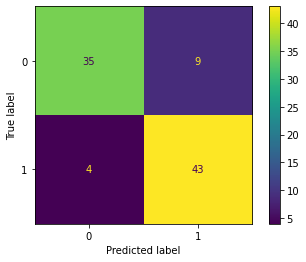

In [307]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test)
plt.show()


In [308]:
evaluate(y_test, y_pred)

Accuracy score: 85.71428571428571
F1 score: 0.8686868686868686
Recall score: 0.9148936170212766
Precision score: 0.8269230769230769
Sensitivity score: 0.9148936170212766
Specificity score: 0.7954545454545454
